Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

# Loading Data

In [30]:
import numpy as np
import pandas as pd
import cv2 as cv
import os
import glob

# flower names
flower_labels = list()
flower_images = list()

#loading
path = "/content/gdrive/MyDrive/drive/flowers/*"

for flower_folder in glob.glob(path):
  flower_name = os.path.basename(flower_folder)
  flower_path = os.path.join(flower_folder, '*')
  # Appending Flower
  for flower in glob.glob(flower_path):
    # Adding flower label
    img = cv.imread(flower)
    print(flower)
    if img is not None:   
      flower_labels.append(flower_name)
      flower_images.append(cv.cvtColor(img, cv.COLOR_BGR2RGB))

/content/gdrive/MyDrive/drive/flowers/daisy/10172567486_2748826a8b.jpg
/content/gdrive/MyDrive/drive/flowers/daisy/10172379554_b296050f82_n.jpg
/content/gdrive/MyDrive/drive/flowers/daisy/10300722094_28fa978807_n.jpg
/content/gdrive/MyDrive/drive/flowers/daisy/10172636503_21bededa75_n.jpg
/content/gdrive/MyDrive/drive/flowers/daisy/1031799732_e7f4008c03.jpg
/content/gdrive/MyDrive/drive/flowers/daisy/102841525_bd6628ae3c.jpg
/content/gdrive/MyDrive/drive/flowers/daisy/100080576_f52e8ee070_n.jpg
/content/gdrive/MyDrive/drive/flowers/daisy/10140303196_b88d3d6cec.jpg
/content/gdrive/MyDrive/drive/flowers/daisy/11023214096_b5b39fab08.jpg
/content/gdrive/MyDrive/drive/flowers/daisy/11834945233_a53b7a92ac_m.jpg
/content/gdrive/MyDrive/drive/flowers/daisy/107592979_aaa9cdfe78_m.jpg
/content/gdrive/MyDrive/drive/flowers/daisy/10994032453_ac7f8d9e2e.jpg
/content/gdrive/MyDrive/drive/flowers/daisy/11124324295_503f3a0804.jpg
/content/gdrive/MyDrive/drive/flowers/daisy/1150395827_6f94a5c6e4_n.jpg


In [32]:
len(flower_labels)

4323

dandelion


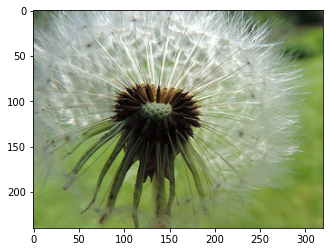

In [31]:
# Displaying a Image
print(flower_labels[1_000])

import matplotlib.pyplot as plt
plt.imshow(flower_images[1_000])
plt.show()

# Resizing

In [36]:
# Finding Minimum width and height
minimum_width = flower_images[0].shape[1]
minimum_height = flower_images[0].shape[0]
for img in flower_images:
  if minimum_width > img.shape[1]:
    minimum_width = img.shape[1]
  if minimum_height > img.shape[0]:
    minimum_height = img.shape[0]
  minimum_width
print(minimum_width, minimum_height)

134 80


In [37]:
# Resizing
size = (minimum_width, minimum_height)
for index, img in enumerate(flower_images):
  flower_images[index] = cv.resize(img, size)

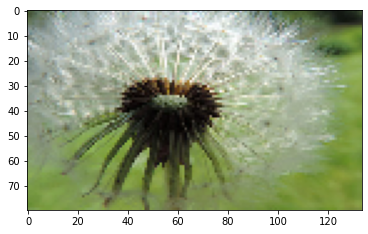

In [38]:
# Checking resizes images
plt.imshow(flower_images[1_000], cmap="gray")
plt.show()

# Shuffling

In [39]:
array = pd.DataFrame(np.arange(len(flower_labels)))

array = array.sample(frac =1)

new_flower_labels = list()
new_flower_images = list()

def shuffle(index):
  new_flower_labels.append(flower_labels[index[0]])
  new_flower_images.append(flower_images[index[0]])

array.apply(shuffle, axis = 1)

flower_labels = new_flower_labels
flower_images = new_flower_images

# Splitting

In [40]:
length = len(flower_labels)

# 60% Train Data
x_train = flower_images[0:int(3/5*length)]
y_train = flower_labels[0:int(3/5*length)]

# 40% Test Data
x_test = flower_images[int(3/5*length + 1):]
y_test = flower_labels[int(3/5*length + 1):]

# Checking
print(len(x_train)/length, len(x_test)/length)

0.5998149433263937 0.39995373583159843


# Encoding Labels

In [41]:
labels_map = {"daisy": 0, "dandelion": 1, "rose": 2, "sunflower": 3, "tulip": 4}

def to_one_hot(labels, dimension=5):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    tmp = labels_map[label] # Get an integral value
    results[i, tmp] = 1.
  return results

y_train = to_one_hot(y_train)
y_test = to_one_hot(y_test)

In [43]:
# Converting Image data to 1-D
for index, img in enumerate(x_train):
  x_train[index] = img.ravel()

for index, img in enumerate(x_test):
  x_test[index] = img.ravel()

x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,32120,32121,32122,32123,32124,32125,32126,32127,32128,32129,32130,32131,32132,32133,32134,32135,32136,32137,32138,32139,32140,32141,32142,32143,32144,32145,32146,32147,32148,32149,32150,32151,32152,32153,32154,32155,32156,32157,32158,32159
0,97,117,22,97,117,22,97,117,22,99,119,24,99,118,25,99,117,26,99,118,26,99,118,26,99,118,26,100,119,27,100,119,27,100,119,27,100,119,27,100,...,27,103,130,27,103,130,27,102,129,26,101,128,25,100,128,25,100,128,25,100,128,25,100,128,25,100,128,25,99,127,24,99,127,24,99,127,24,99,127,24
1,36,40,33,33,37,31,30,32,28,26,28,23,26,28,23,23,25,20,21,24,17,20,22,17,22,22,19,23,24,19,24,25,20,25,24,22,26,26,24,27,...,43,65,117,45,60,121,43,66,119,48,66,121,46,70,123,49,62,120,43,67,127,45,63,123,43,66,123,48,67,127,44,70,126,50,71,128,50,72,126,50
2,81,102,38,66,93,38,56,85,36,61,89,41,68,96,41,69,97,39,75,100,43,77,102,45,82,105,50,79,104,46,79,104,46,77,102,44,76,101,44,80,...,91,184,196,106,174,191,91,165,190,69,162,190,61,164,192,63,158,186,59,153,179,58,147,172,57,137,163,51,128,156,46,128,156,48,140,167,56,161,189,68
3,7,9,8,8,10,9,8,12,8,9,9,7,9,10,8,7,11,7,7,12,8,8,10,6,8,9,6,10,12,8,9,11,9,4,9,6,10,11,10,6,...,220,195,203,209,87,96,95,47,45,44,51,50,55,111,116,133,152,168,166,194,207,223,195,208,224,193,205,221,196,210,226,194,209,225,198,212,229,197,215,230
4,35,19,0,58,43,2,61,43,0,69,38,1,78,50,0,77,54,11,84,52,11,54,45,15,41,37,26,26,31,23,35,34,21,30,30,19,60,42,6,74,...,37,7,19,24,6,17,18,4,13,14,77,69,8,96,76,4,83,63,0,26,6,0,29,8,0,30,10,0,31,12,1,28,10,0,32,11,0,37,14,0


In [49]:
x_test.loc[0].shape # Checking Shape

(32160,)

# Creating Model

In [56]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(1024, activation='relu', input_shape=x_test.loc[0].shape))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

# Compilation

In [57]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Training

In [58]:
history = model.fit(x_train, y_train, epochs=100, batch_size=512)

Epoch 1/100
6/6 [==============================] - 5s 750ms/step - loss: 19798.4685 - accuracy: 0.2095
Epoch 2/100
6/6 [==============================] - 5s 754ms/step - loss: 3854.3169 - accuracy: 0.2416
Epoch 3/100
6/6 [==============================] - 5s 744ms/step - loss: 1374.2052 - accuracy: 0.2183
Epoch 4/100
6/6 [==============================] - 5s 747ms/step - loss: 693.7794 - accuracy: 0.2010
Epoch 5/100
6/6 [==============================] - 5s 757ms/step - loss: 249.2507 - accuracy: 0.1741
Epoch 6/100
6/6 [==============================] - 5s 746ms/step - loss: 342.5318 - accuracy: 0.2134
Epoch 7/100
6/6 [==============================] - 5s 745ms/step - loss: 165.9448 - accuracy: 0.1884
Epoch 8/100
6/6 [==============================] - 5s 746ms/step - loss: 1.6089 - accuracy: 0.2366
Epoch 9/100
6/6 [==============================] - 5s 769ms/step - loss: 1.6089 - accuracy: 0.2332
Epoch 10/100
6/6 [==============================] - 5s 745ms/step - loss: 1.6087 - accuracy

# Evaluation

In [60]:
model.evaluate(x_test, y_test) # 25% ACC

55/55 [==============================] - 3s 46ms/step - loss: 1.5983 - accuracy: 0.2504


[1.598288893699646, 0.2504337728023529]